In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
from scipy.special import boxcox1p

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [577]:
def piechart(data, std_name, xsize=12, ysize=5, sub_name=''):
    total_count = data.sum()
    item_size = len(data)
    if sub_name:
            sub_name = 'of ' + sub_name
    f, ax =plt.subplots(1, item_size, figsize=(xsize, ysize), facecolor='whitesmoke')
    for i, (item, count)  in enumerate(data.items()):
        colors = ['white'] * item_size
        colors[i] = 'crimson'
        ax[i].pie(data, colors=colors)
        ax[i].set_title(item, fontweight='bold', size=15)
        ax[i].set_xlabel(f'{count / total_count * 100:.2f}%',
                        fontweight='bold', size=13)
    f.suptitle(f'Percentage {sub_name} by {std_name}',
              fontweight='bold', size=20,
              color='crimson')

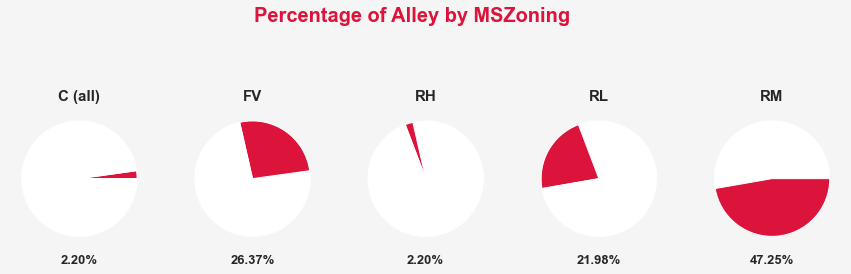

In [578]:
piechart(train.groupby('MSZoning').Alley.count(),
         std_name='MSZoning', sub_name='Alley',
         xsize=15)

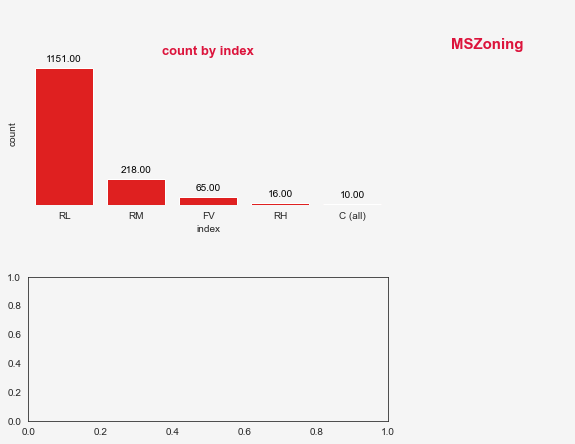

In [665]:
def nominal():
    f = plt.figure(facecolor='whitesmoke', figsize=(5, 5))
    sns.set_style('white')

    ax1 = f.add_axes([0, .6, 1, .4], facecolor='whitesmoke')
    sns.barplot(x=train.MSZoning.value_counts().index,
               y=train.MSZoning.value_counts().values,
               color='red', ax=ax1)
    for p in ax1.patches:
        ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 10), 
           ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
           textcoords='offset points'
    )
    ax1.set_xlabel('index')
    ax1.set_ylabel('count')
    ax1.set_title('count by index', color='crimson', fontweight='bold', size=13)
    ax1.set_yticklabels([])
    ax1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    ax2 = f.add_axes([0, 0, 1, .4], facecolor='whitesmoke')

    ax3 = f.add_axes([1, 0, 0.5, 1.15], facecolor='whitesmoke')
    ax3.axis('off')
    ax3.text(0.35, .9, 'MSZoning', color='crimson',
             fontsize=15, fontweight='bold')
    plt.show()

In [670]:
cnt_missing = train.isnull().sum().sort_values(ascending=False)
cnt_percent = cnt_missing / train.shape[0]
missing_table = pd.DataFrame([cnt_missing, cnt_percent], 
                             index=['missing count', 'missing percent']).T
missing_table = missing_table[missing_table['missing count'] > 0]

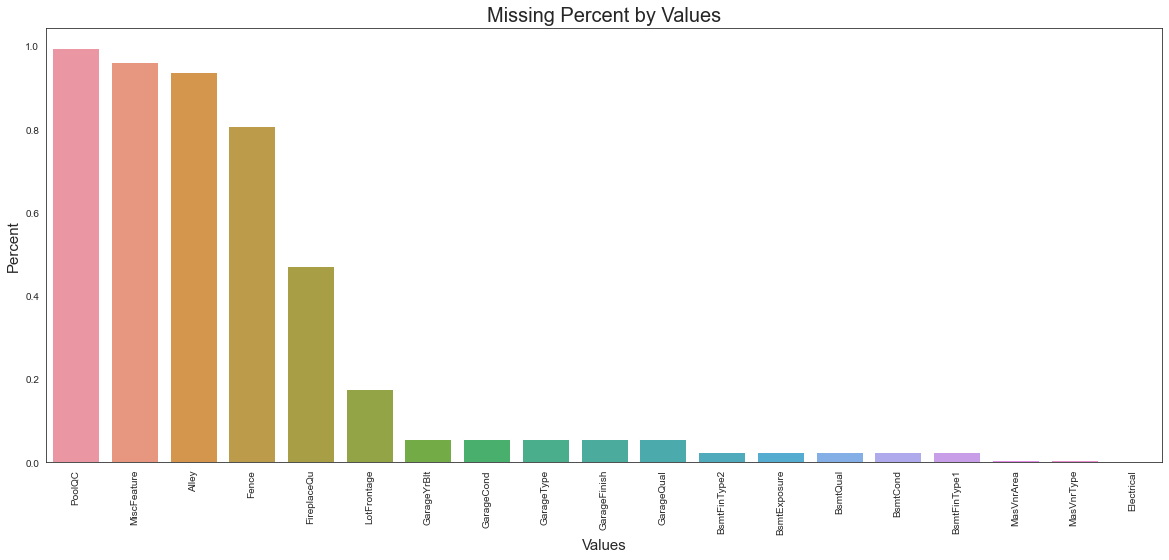

In [671]:
f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=missing_table.index, y=missing_table['missing percent'])
plt.title('Missing Percent by Values', size=20)
plt.xlabel('Values', size=15)
plt.ylabel('Percent', size=15)
plt.xticks(rotation='90')
plt.show()